In [1]:
from utils import NuScenesDataSet 
import numpy as np 
from matplotlib import pyplot as plt 
import tensorflow as tf

dataroot = '../../../../datasets/nuscenes/'
nuscd = NuScenesDataSet(dataroot)

2024-02-27 13:38:28.702560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 13:38:28.702659: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 13:38:28.705565: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 13:38:28.726825: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 13:38:29.394872: W tensorflow/compiler/tf2

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 29.651 seconds.
Reverse indexing ...
Done reverse indexing in 5.8 seconds.


# Visualize voxels high and low resolution

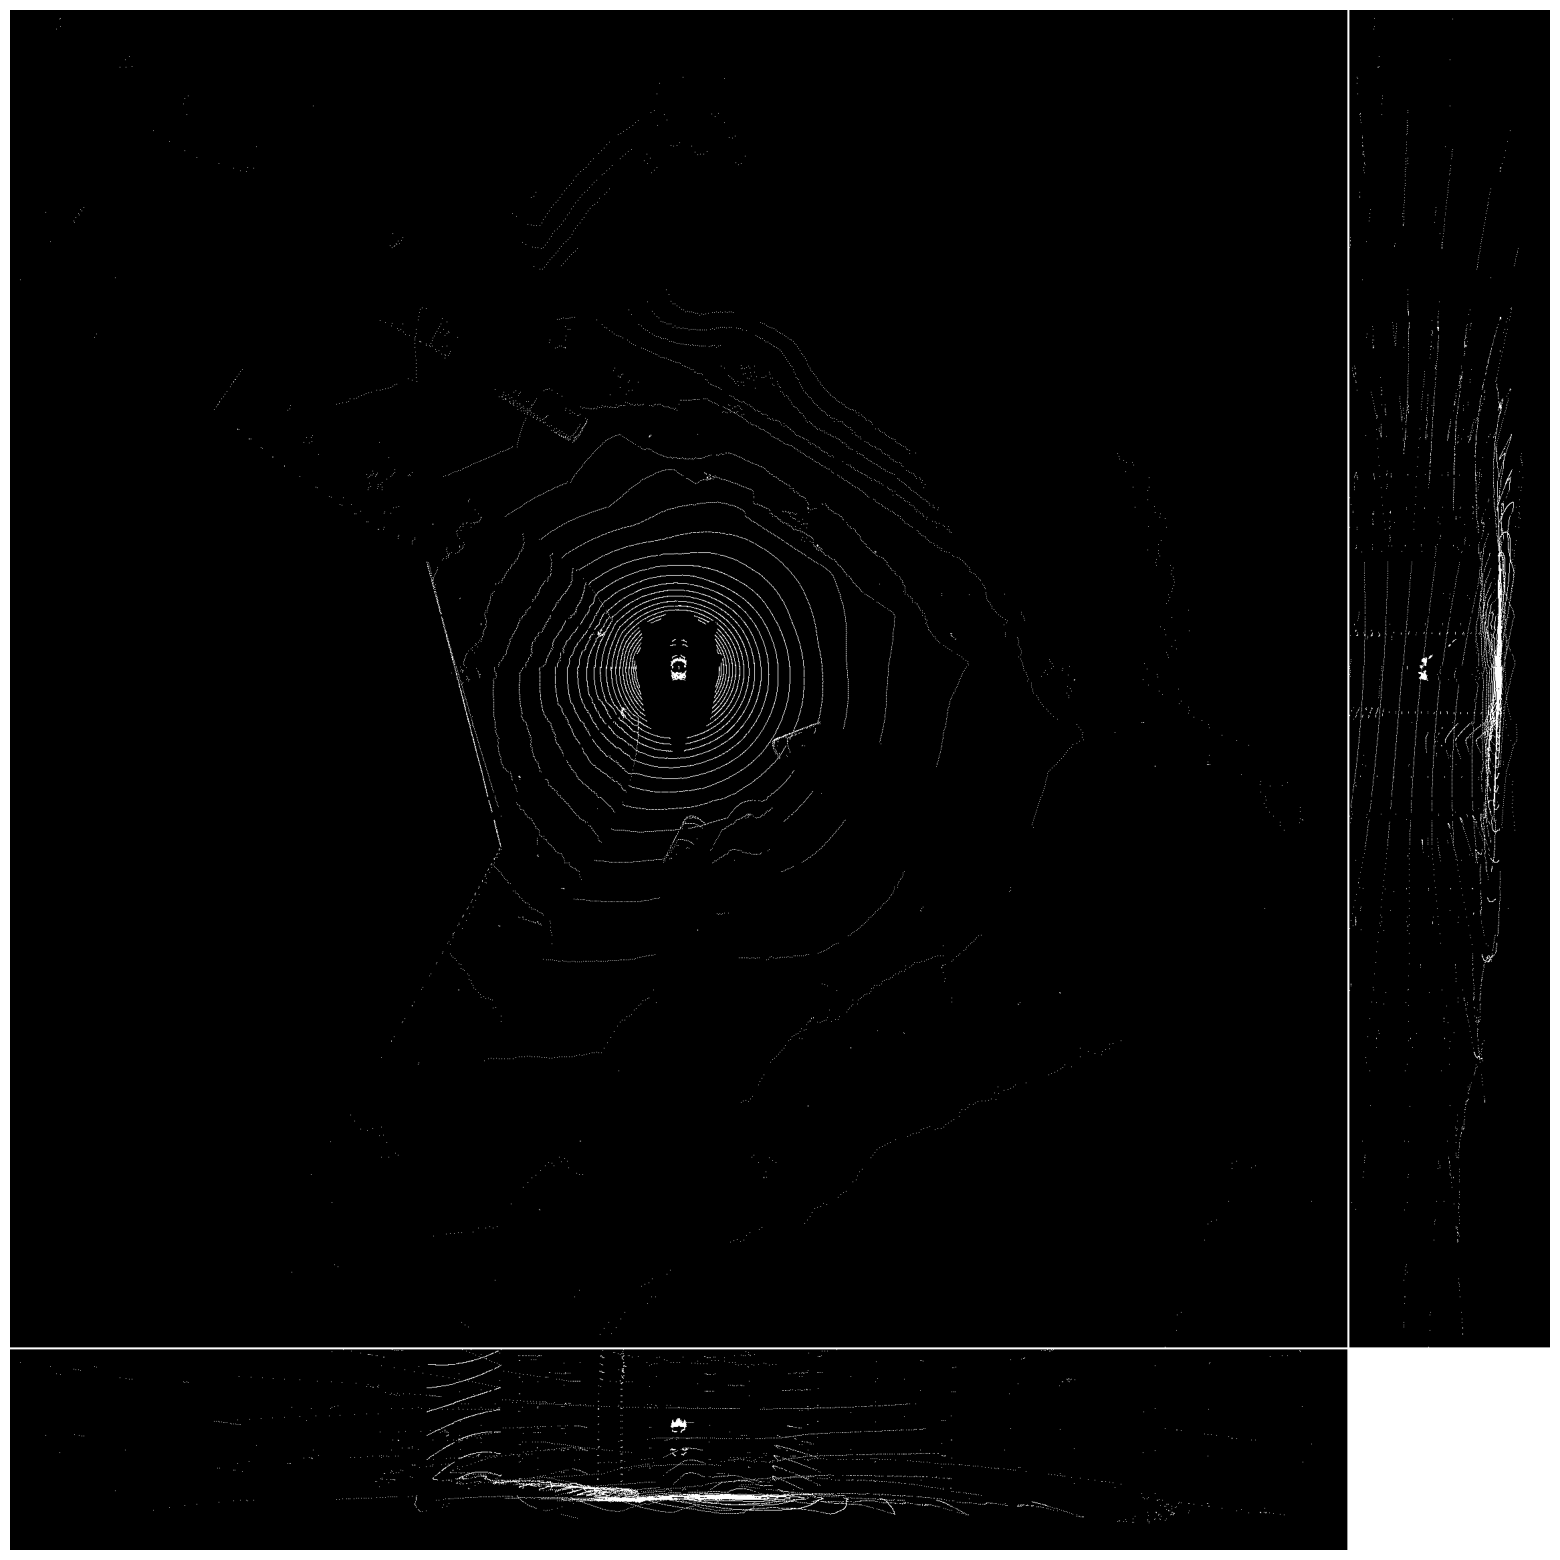

3272.0


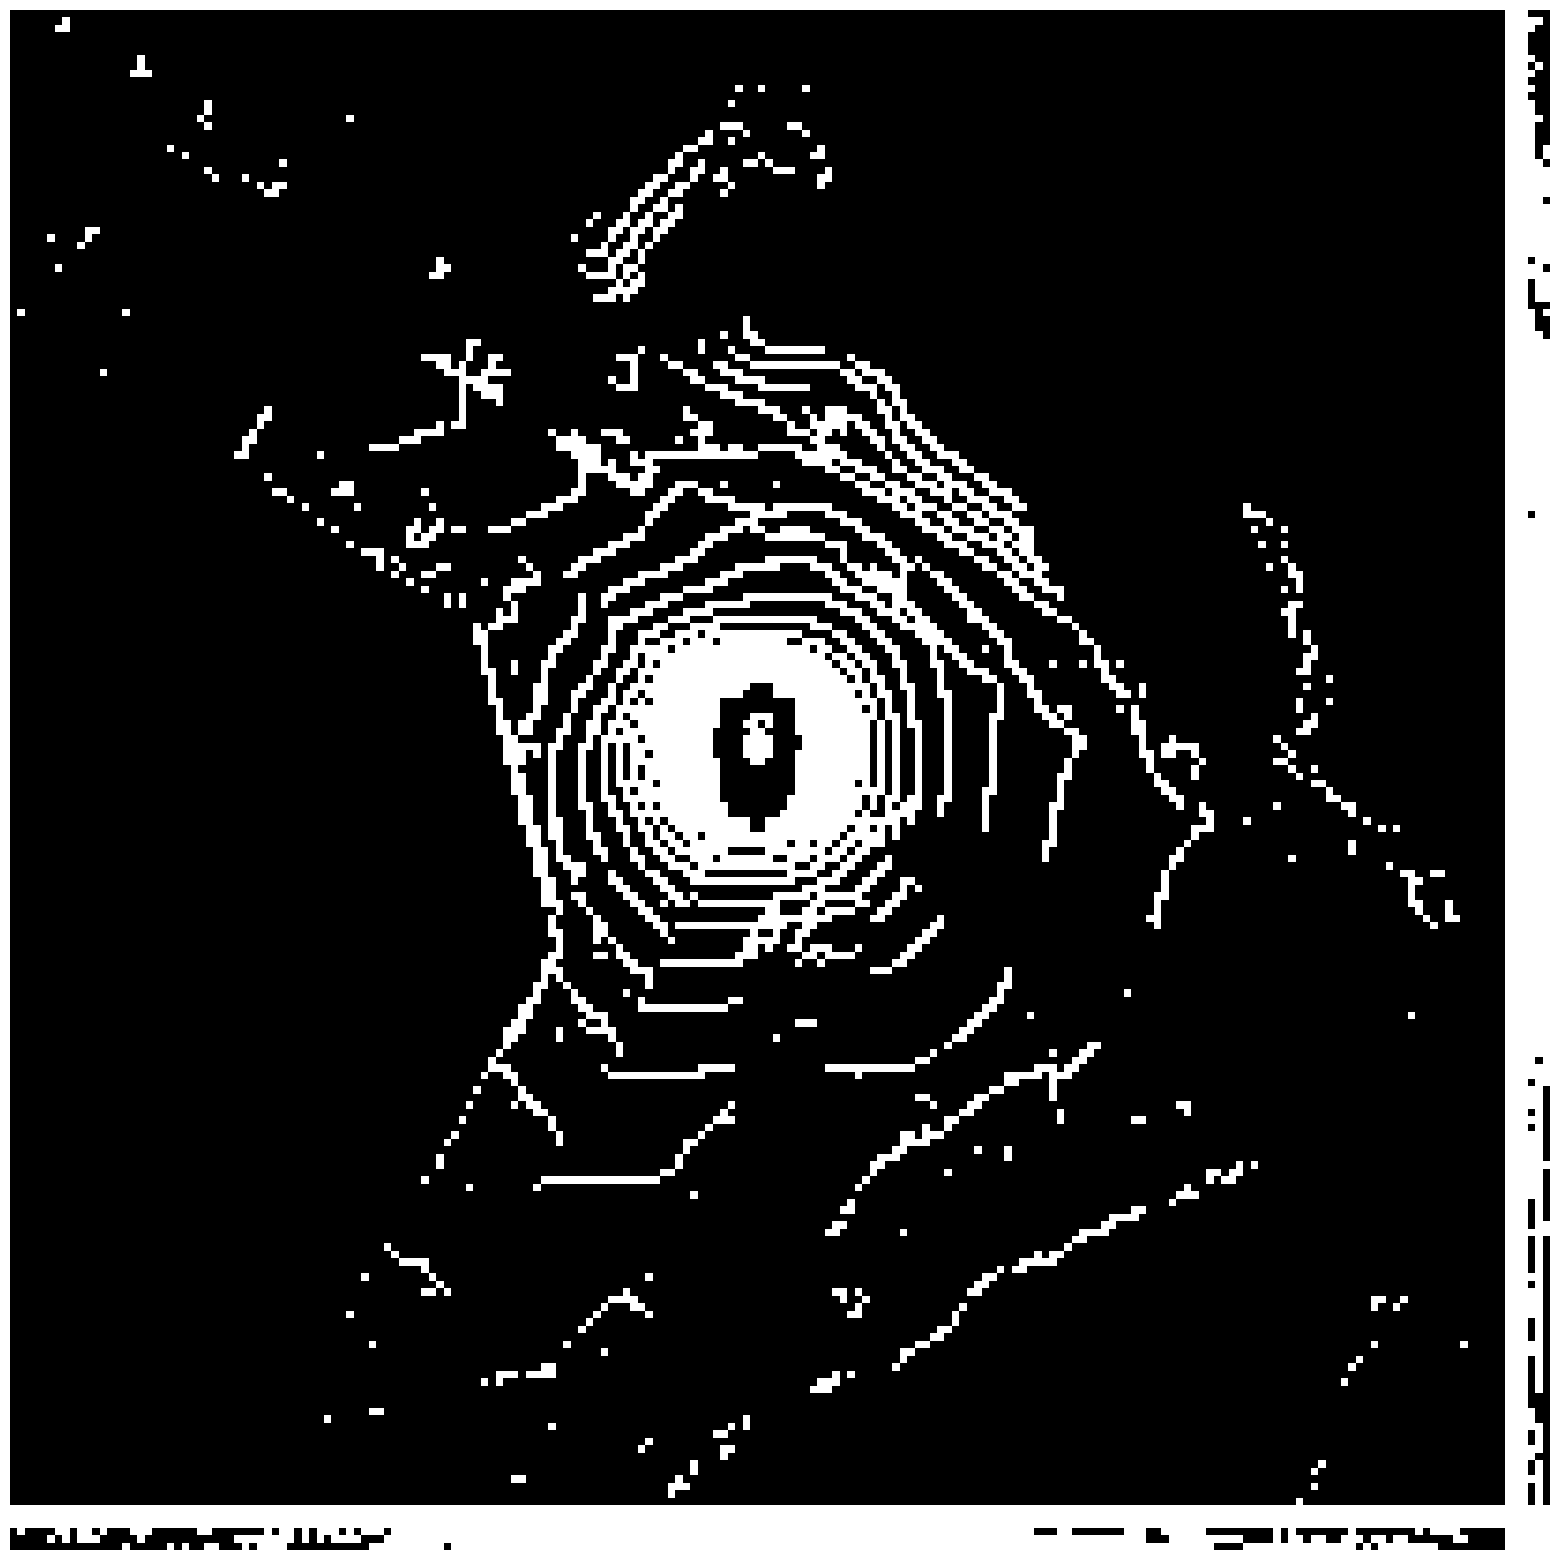

In [20]:
train_samples, val_samples = nuscd.get_training_val_samples()

idx = 0

voxel_lidar = nuscd.get_samples_bev_lidar(train_samples[idx], (2000,2000,300), metric_span=[(-50,50), (-50,50), (-1,3)])
front  = np.sum(voxel_lidar[:,:,:], axis=0).transpose()
side = np.sum(voxel_lidar[:,:,:], axis=1)
top_down = np.sum(voxel_lidar[:,:,:], axis=2)


front = (front >= 1) * 1.0
side = (side >= 1) * 1.0
top_down = (top_down >=1) * 1.0
top_down_side = np.concatenate((top_down, np.ones((voxel_lidar.shape[0],3)) ,side), axis=1)
front = np.concatenate((front, np.ones((front.shape[0], front.shape[0]+3))), axis= 1)
top_down_side_front = np.concatenate( (top_down_side, np.ones((3, top_down_side.shape[1])), front), axis = 0)

plt.figure(figsize=(20,20))
plt.axis(False)
plt.imshow(top_down_side_front, cmap='gray')
plt.show()

train_samples, val_samples = nuscd.get_training_val_samples()
voxel_lidar = nuscd.get_samples_bev_lidar(train_samples[idx], (200,200,3), metric_span=[(-50,50), (-50,50), (-1,3)])

front  = np.sum(voxel_lidar[:,:,:], axis=0).transpose()
side = np.sum(voxel_lidar[:,:,:], axis=1)
top_down = np.sum(voxel_lidar[:,:,:], axis=2)
front = (front >= 1) * 1.0
side = (side >= 1) * 1.0
top_down = (top_down >=1) * 1.0
top_down_side = np.concatenate((top_down, np.ones((voxel_lidar.shape[0],3)) ,side), axis=1)
front = np.concatenate((front, np.ones((front.shape[0], front.shape[0]+3))), axis= 1)
top_down_side_front = np.concatenate( (top_down_side, np.ones((3, top_down_side.shape[1])), front), axis = 0)


plt.figure(figsize=(20,20))
plt.axis(False)
plt.imshow(top_down_side_front, cmap='gray')
plt.show()

# Save low resolution voxels

In [ ]:
train_samples, val_samples = nuscd.get_training_val_samples()
print(len(train_samples), len(val_samples))

file_path_train = '../../../../datasets/lidar_voxels_train/'
file_path_val = '../../../../datasets/lidar_voxels_val/'

for idx, sample in enumerate(train_samples):
    sample = nuscd.get_samples_bev_lidar(sample, (200,200,4), [(-50,50),(-50,50),(-1,3)])
    nuscd.save_as_binary(sample, file_path_train+str(idx)+'.txt')
    if idx%5000 ==0: print(f'{idx} training samples saved')

for idx, sample in enumerate(val_samples):
    sample = nuscd.get_samples_bev_lidar(sample, (200,200,4), [(-50,50),(-50,50),(-1,3)])
    nuscd.save_as_binary(sample, file_path_val+str(idx)+'.txt')
    if idx%5000 ==0: print(f'{idx} val samples saved')

# Load saved voxels and visualize

In [2]:
import tensorflow as tf

file_path_train = '../../../../datasets/lidar_voxels_train/'
file_path_val = '../../../../datasets/lidar_voxels_val/'
train_files_paths, val_files_paths = nuscd.get_train_val_file_paths(file_path_train, file_path_val)

#to load the voxels it is nessesary to know the dtype and shape of the saved voxels to rightly decode the data. Which is in our case float32 and (200,200,4)
dataset_lidar_voxels = tf.data.Dataset.from_tensor_slices(train_files_paths).map(lambda file_path: nuscd.read_binary_file(file_path, tf.float32, (200,200,4)))



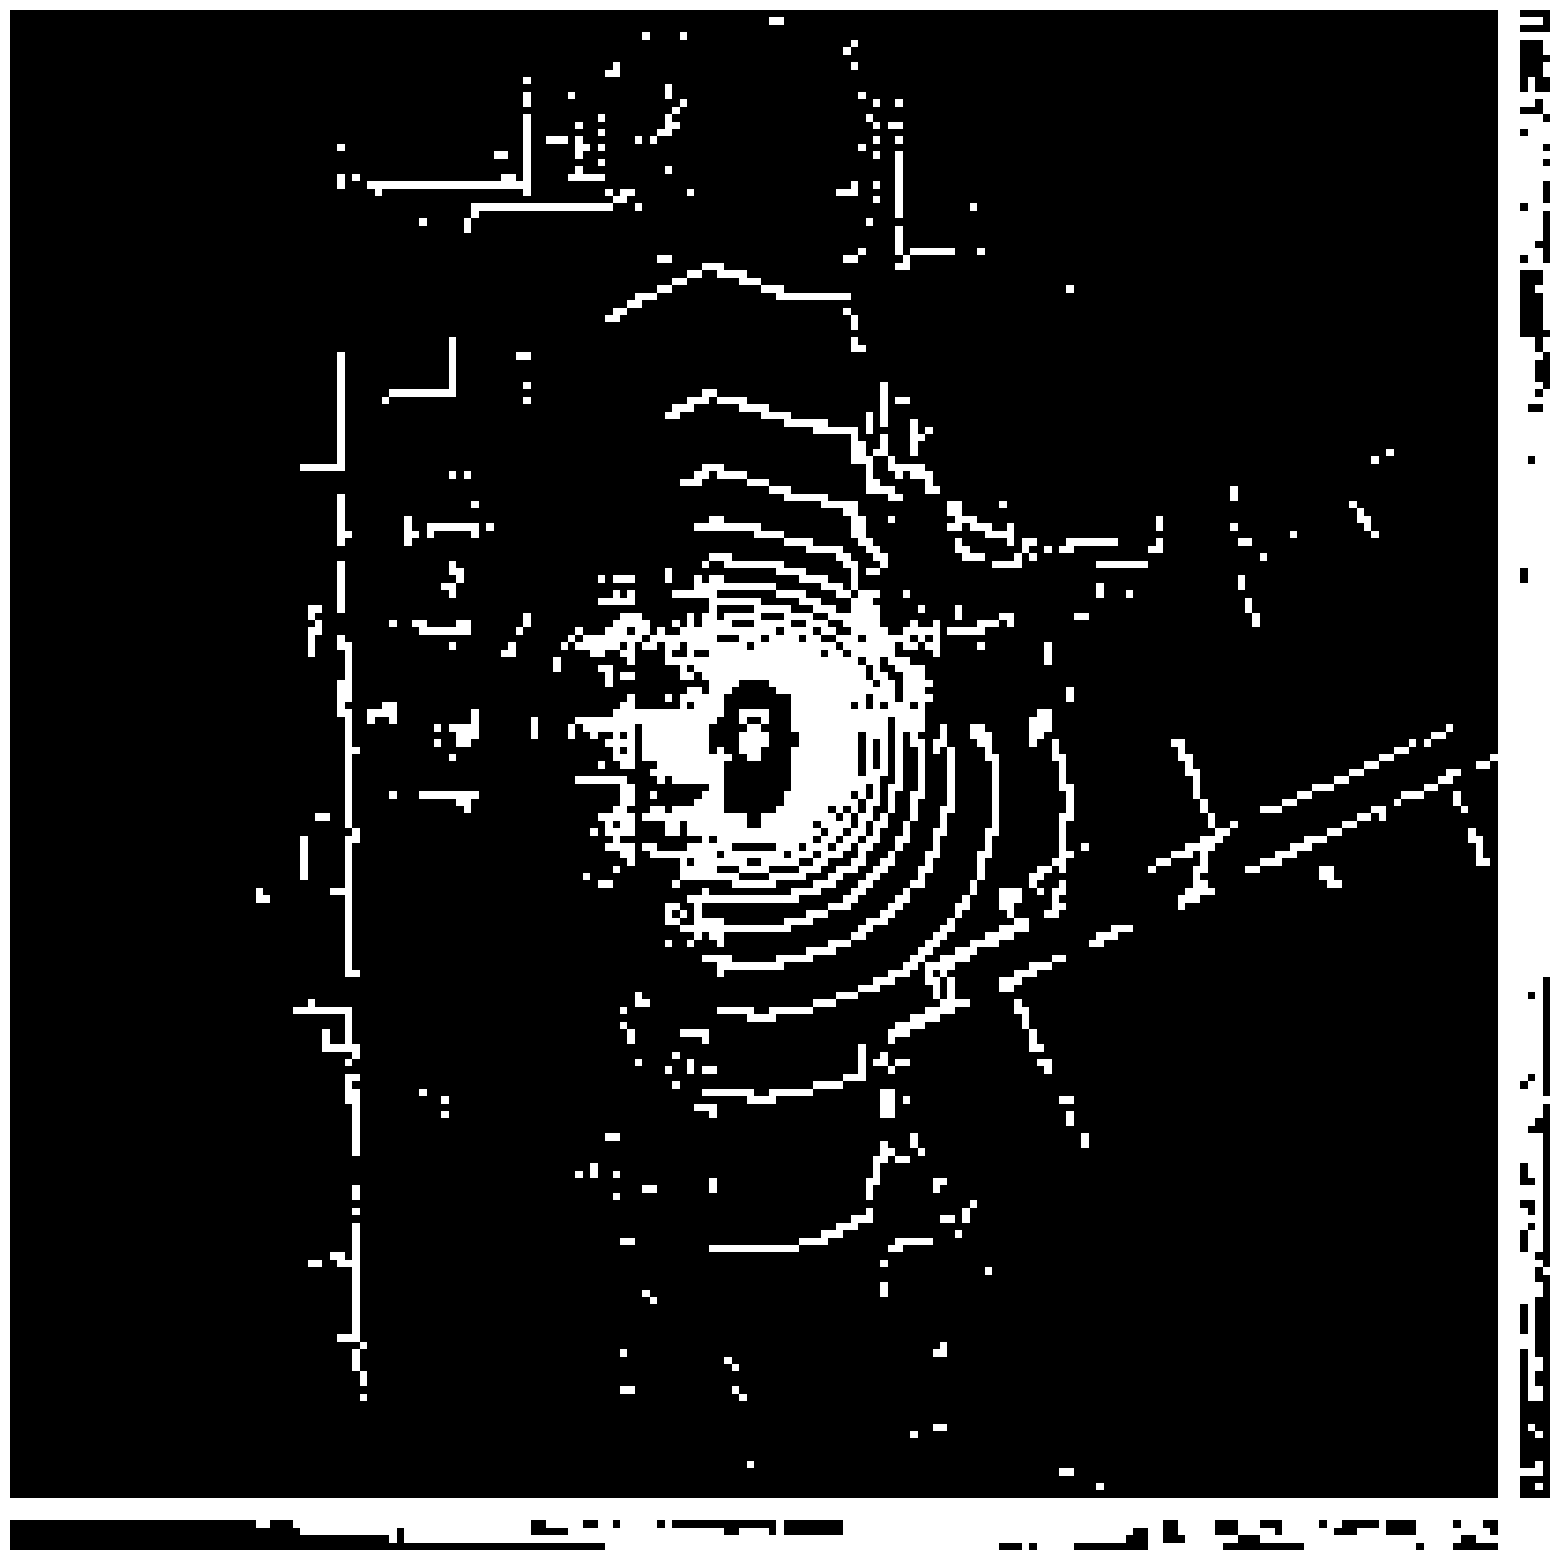

In [8]:

idx = 1200
#take the first 
for x in  dataset_lidar_voxels.skip(idx):
    voxel_lidar = x
    break

front  = np.sum(voxel_lidar[:,:,:], axis=0).transpose()
side = np.sum(voxel_lidar[:,:,:], axis=1)
top_down = np.sum(voxel_lidar[:,:,:], axis=2)
front = (front >= 1) * 1.0
side = (side >= 1) * 1.0
top_down = (top_down >=1) * 1.0
top_down_side = np.concatenate((top_down, np.ones((voxel_lidar.shape[0],3)) ,side), axis=1)
front = np.concatenate((front, np.ones((front.shape[0], front.shape[0]+3))), axis= 1)
top_down_side_front = np.concatenate( (top_down_side, np.ones((3, top_down_side.shape[1])), front), axis = 0)
plt.figure(figsize=(20,20))
plt.axis(False)
plt.imshow(top_down_side_front, cmap='gray')
plt.show()